### MLP

# Dataset is available on = https://www.kaggle.com/datasets/ankushpanday1/thyroid-cancer-risk-prediction-dataset/data

About Dataset

This dataset contains 212,691 records with 23 attributes, simulating real-world thyroid cancer risk factors. It is intentionally towards certain ethnicities, countries, and risk factors such as radiation exposure, iodine deficiency, and family history. The dataset can be used for machine learning modeling, bias detection, fairness analysis, and medical research simulations

Key Attributes

    Patient_ID: A unique identifier for each patient.

    Label: This seems to be a numerical identifier or a range, possibly related to patient grouping or anonymization.

    Age: The age of the patient, ranging from 15 to 89 years.

    Gender: The gender of the patient, with values 'Female' (60%) and 'Male' (40%).

    Country: The country of origin of the patient. The dataset includes patients from India (20%), China (15%), and other countries (65%).

    Ethnicity: The ethnic background of the patient, including 'Caucasian' (30%), 'Asian' (25%), and other ethnicities (45%).

    Family_History: A boolean value indicating whether the patient has a family history of thyroid-related issues (30% true, 70% false).

    Radiation_Exposure: A boolean value indicating whether the patient has been exposed to radiation (15% true, 85% false).

    Iodine_Deficiency: A boolean value indicating whether the patient has iodine deficiency (25% true, 75% false).

    Smoking: A boolean value indicating whether the patient is a smoker (20% true, 80% false).

    Obesity: A boolean value indicating whether the patient is obese (30% true, 70% false).

    Diabetes: A boolean value indicating whether the patient has diabetes (20% true, 80% false).

    TSH_Level: Thyroid-Stimulating Hormone level, ranging from 0.10 to 10.00.

    T3_Level: Triiodothyronine level, ranging from 0.50 to 3.50.

    T4_Level: Thyroxine level, ranging from 4.50 to 12.00.

    Nodule_Size: The size of the thyroid nodule, ranging from 0.00 to 5.00 cm.

    Thyroid_Cancer_Risk: The risk level of thyroid cancer, categorized as 'Low' (51%), 'Medium' (34%), and other (15%).

    Diagnosis: The final diagnosis, either 'Benign' (77%) or 'Malignant' (23%).


In [64]:
# Importing required libs
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, roc_auc_score
from imblearn.over_sampling import ADASYN
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import seaborn as sns
from torch.utils.data import DataLoader, TensorDataset

In [65]:
data = pd.read_csv('/home/srihari/Documents/MidTerm(SujitSir)/thyroid_cancer_risk_data.csv')  #reading the data

## EDA and Pre-processing

In [66]:
data.head()

,Patient_ID,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
0,1,66,Male,Russia,Caucasian,No,Yes,No,No,No,No,9.37,1.67,6.16,1.08,Low,Benign
1,2,29,Male,Germany,Hispanic,No,Yes,No,No,No,No,1.83,1.73,10.54,4.05,Low,Benign
2,3,86,Male,Nigeria,Caucasian,No,No,No,No,No,No,6.26,2.59,10.57,4.61,Low,Benign
3,4,75,Female,India,Asian,No,No,No,No,No,No,4.10,2.62,11.04,2.46,Medium,Benign
4,5,35,Female,Germany,African,Yes,Yes,No,No,No,No,9.10,2.11,10.71,2.11,High,Benign


In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212691 entries, 0 to 212690
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Patient_ID           212691 non-null  int64  
 1   Age                  212691 non-null  int64  
 2   Gender               212691 non-null  object 
 3   Country              212691 non-null  object 
 4   Ethnicity            212691 non-null  object 
 5   Family_History       212691 non-null  object 
 6   Radiation_Exposure   212691 non-null  object 
 7   Iodine_Deficiency    212691 non-null  object 
 8   Smoking              212691 non-null  object 
 9   Obesity              212691 non-null  object 
 10  Diabetes             212691 non-null  object 
 11  TSH_Level            212691 non-null  float64
 12  T3_Level             212691 non-null  float64
 13  T4_Level             212691 non-null  float64
 14  Nodule_Size          212691 non-null  float64
 15  Thyroid_Cancer_Ri

In [68]:
data.describe()

,Patient_ID,Age,TSH_Level,T3_Level,T4_Level,Nodule_Size
count,212691.00000,212691.000000,212691.000000,212691.000000,212691.000000,212691.000000
mean,106346.00000,51.918497,5.045102,2.001727,8.246204,2.503403
std,61398.74739,21.632815,2.860264,0.866248,2.164188,1.444631
min,1.00000,15.000000,0.100000,0.500000,4.500000,0.000000
25%,53173.50000,33.000000,2.570000,1.250000,6.370000,1.250000
50%,106346.00000,52.000000,5.040000,2.000000,8.240000,2.510000
75%,159518.50000,71.000000,7.520000,2.750000,10.120000,3.760000
max,212691.00000,89.000000,10.000000,3.500000,12.000000,5.000000


In [69]:
data.isnull().sum()

Patient_ID             0
Age                    0
Gender                 0
Country                0
Ethnicity              0
Family_History         0
Radiation_Exposure     0
Iodine_Deficiency      0
Smoking                0
Obesity                0
Diabetes               0
TSH_Level              0
T3_Level               0
T4_Level               0
Nodule_Size            0
Thyroid_Cancer_Risk    0
Diagnosis              0
dtype: int64

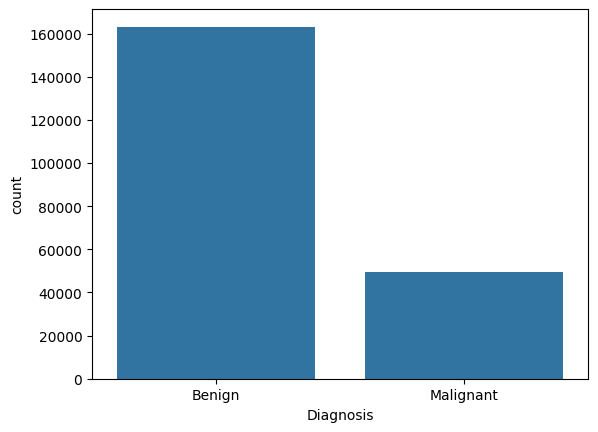

In [70]:
# all the vizualization are visible on kaggle dataset main page so i didnt do it it again here but i have done one on diagnosis column as it is our target column

sns.countplot(x='Diagnosis',data=data)  #countplot of diagnosis
plt.show()

In [71]:
# categorizing the data into binary and non-binary columns
binarycol=['Gender','Family_History','Radiation_Exposure','Iodine_Deficiency','Smoking','Obesity','Diabetes','Diagnosis']
nonbinarycol =['Country', 'Ethnicity']

In [72]:
# Label encoding the binary columns
label_encoder ={}
for col in binarycol:
  label_encoder[col] = LabelEncoder()
  data[col] = label_encoder[col].fit_transform(data[col])

In [73]:
data.head()

,Patient_ID,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
0,1,66,1,Russia,Caucasian,0,1,0,0,0,0,9.37,1.67,6.16,1.08,Low,0
1,2,29,1,Germany,Hispanic,0,1,0,0,0,0,1.83,1.73,10.54,4.05,Low,0
2,3,86,1,Nigeria,Caucasian,0,0,0,0,0,0,6.26,2.59,10.57,4.61,Low,0
3,4,75,0,India,Asian,0,0,0,0,0,0,4.10,2.62,11.04,2.46,Medium,0
4,5,35,0,Germany,African,1,1,0,0,0,0,9.10,2.11,10.71,2.11,High,0


In [74]:
# One hot encoding the non-binary columns
one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_data = one_hot_encoder.fit_transform(data[nonbinarycol])
one_hot_data= pd.DataFrame(encoded_data, columns=one_hot_encoder.get_feature_names_out(nonbinarycol))
data = pd.concat([data, one_hot_data], axis=1)
data.drop(nonbinarycol, axis=1, inplace=True)

In [75]:
data.head()

,Patient_ID,Age,Gender,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,...,Country_Japan,Country_Nigeria,Country_Russia,Country_South Korea,Country_UK,Country_USA,Ethnicity_Asian,Ethnicity_Caucasian,Ethnicity_Hispanic,Ethnicity_Middle Eastern
0,1,66,1,0,1,0,0,0,0,9.37,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2,29,1,0,1,0,0,0,0,1.83,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3,86,1,0,0,0,0,0,0,6.26,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4,75,0,0,0,0,0,0,0,4.10,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,5,35,0,1,1,0,0,0,0,9.10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
# Splitting the data into train and test
x = data.drop(['Patient_ID','Thyroid_Cancer_Risk','Diagnosis'], axis=1)
y = data['Diagnosis']
X_train,X_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [77]:
X_train.shape

(170152, 25)

In [78]:
X_test.shape

(42539, 25)

In [79]:
y_train.shape

(170152,)

In [80]:
y_test.shape

(42539,)

In [81]:
# Saw Class Imblance in the Diagnosis column so balancing the data using ADASYN
ADASYN = ADASYN(random_state=42)
X_train_resampled,y_train_resampled= ADASYN.fit_resample(X_train,y_train)

In [82]:
pd.Series(y_train_resampled).value_counts()

Diagnosis
1    136187
0    130556
Name: count, dtype: int64

In [83]:
X_train_resampled.shape[1]

25

In [84]:
# converting the data into tensors for pytorch model
X_train_tensor= torch.tensor(X_train_resampled.values,dtype=torch.float32)
X_test_tensor= torch.tensor(X_test.values,dtype=torch.float32)
y_train_tensor= torch.tensor(y_train_resampled.values,dtype=torch.float32)
y_test_tensor= torch.tensor(y_test.values,dtype=torch.float32)

## Single Layer Single Perceptron

In [85]:
# Creating class for the model
class SinglelayerSinglePerceptron(nn.Module):
    def __init__(self):
        super(SinglelayerSinglePerceptron, self).__init__()
        self.fc=nn.Linear(25, 1)
        self.sigmoid= nn.Sigmoid()

    def forward(self,x):
        out= self.fc(x)
        out= self.sigmoid(out)
        return out

In [86]:
model1= SinglelayerSinglePerceptron()  # creating object for the model

In [87]:
criterion= nn.MSELoss()  # defining the loss function
optimizer1= optim.Adam(model1.parameters(),lr=0.001) # defining the optimizer

In [88]:
num_epochs= 50 # number of epochs
batch_size= 100 # batch size

# defining the training function for all the models
def train_model(model, optimizer, criterion, X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor, num_epochs, batch_size):
  train_losses = []
  test_losses= []
  train_accuracies= []
  test_accuracies= []

  train_dataset= TensorDataset(X_train_tensor,y_train_tensor)
  train_loader= DataLoader(train_dataset,batch_size=batch_size,shuffle=True)

  y_train_np = y_train_tensor.numpy().astype(int)
  y_test_np = y_test_tensor.numpy().astype(int)

  for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for batch_inputs, batch_targets in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_inputs)
        loss = criterion(outputs, batch_targets.view(-1, 1))
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * batch_inputs.size(0)
    
    epoch_train_loss= running_loss/len(train_loader.dataset)
    

    model.eval()
    with torch.no_grad():
        # Training set evaluation
        train_outputs = model(X_train_tensor)
        train_loss = criterion(train_outputs, y_train_tensor.view(-1, 1))
        train_pred = (train_outputs.numpy() > 0.5).astype(int)
        train_accuracy = accuracy_score(y_train_np, train_pred)
        train_precision = precision_score(y_train_np, train_pred, zero_division=0)
        train_recall = recall_score(y_train_np, train_pred, zero_division=0)
        train_f1 = f1_score(y_train_np, train_pred, zero_division=0)
        
        # Test set evaluation
        test_outputs = model(X_test_tensor)
        test_loss = criterion(test_outputs, y_test_tensor.view(-1, 1))
        test_pred = (test_outputs.numpy() > 0.5).astype(int)
        test_accuracy = accuracy_score(y_test_np, test_pred)
        test_precision = precision_score(y_test_np, test_pred, zero_division=0)
        test_recall = recall_score(y_test_np, test_pred, zero_division=0)
        test_f1 = f1_score(y_test_np, test_pred, zero_division=0)
        test_confusion = confusion_matrix(y_test_np, test_pred)
        test_auc = roc_auc_score(y_test_np, test_pred)
    
    train_losses.append(epoch_train_loss)
    test_losses.append(test_loss.item())
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Batch Train Loss: {epoch_train_loss:.4f},'
          f' Train Loss: {train_loss.item():.4f}, Train Accuracy: {train_accuracy:.4f},'
          f' Train Precision: {train_precision:.4f}, Train Recall: {train_recall:.4f}, Train F1: {train_f1:.4f}, '
          f'Test Loss: {test_loss.item():.4f}, Test Accuracy: {test_accuracy:.4f}, '
          f'Test Precision: {test_precision:.4f}, Test Recall: {test_recall:.4f}, Test F1: {test_f1:.4f}, '
          f'Test ROC-AUC: {test_auc:.4f}')

  plt.figure()
  plt.plot(train_accuracies, label='Train Accuracy')
  plt.plot(test_accuracies, label='Test Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

  plt.figure()
  plt.plot(train_losses, label='Train Loss')
  plt.plot(test_losses, label='Test Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

Epoch [1/50], Batch Train Loss: 0.2316, Train Loss: 0.2237, Train Accuracy: 0.6378, Train Precision: 0.6467, Train Recall: 0.6407, Train F1: 0.6437, Test Loss: 0.2375, Test Accuracy: 0.6012, Test Precision: 0.2912, Test Recall: 0.4978, Test F1: 0.3675, Test ROC-AUC: 0.5652
Epoch [2/50], Batch Train Loss: 0.2238, Train Loss: 0.2244, Train Accuracy: 0.6360, Train Precision: 0.6641, Train Recall: 0.5808, Train F1: 0.6197, Test Loss: 0.2278, Test Accuracy: 0.6343, Test Precision: 0.3055, Test Recall: 0.4488, Test F1: 0.3636, Test ROC-AUC: 0.5697
Epoch [3/50], Batch Train Loss: 0.2238, Train Loss: 0.2233, Train Accuracy: 0.6362, Train Precision: 0.6424, Train Recall: 0.6485, Train F1: 0.6454, Test Loss: 0.2385, Test Accuracy: 0.5937, Test Precision: 0.2873, Test Recall: 0.5036, Test F1: 0.3658, Test ROC-AUC: 0.5623
Epoch [4/50], Batch Train Loss: 0.2237, Train Loss: 0.2233, Train Accuracy: 0.6378, Train Precision: 0.6314, Train Recall: 0.6978, Train F1: 0.6630, Test Loss: 0.2470, Test Accur

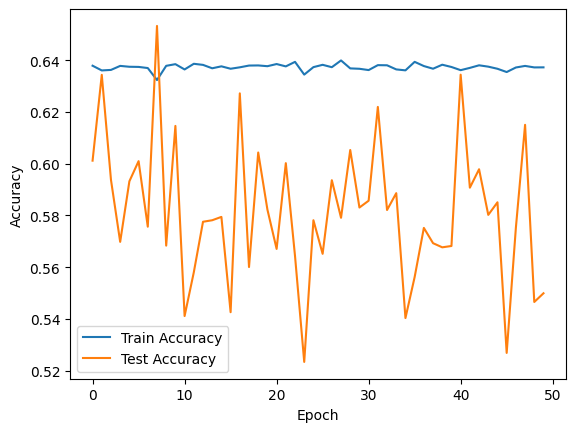

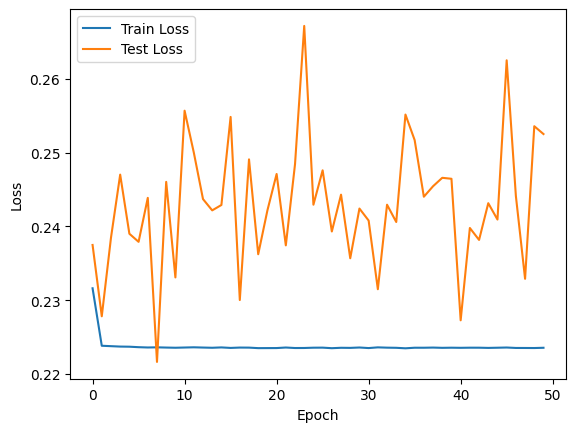

In [89]:
# training the model
train_model(model1,optimizer1,criterion,X_train_tensor,y_train_tensor,X_test_tensor,y_test_tensor,num_epochs,batch_size)

In [90]:
# Predictions function for all the models
def get_predictions(model, X_tensor):
    model.eval()
    with torch.no_grad():
        outputs = model(X_tensor)
        predictions = (outputs.numpy() > 0.5).astype(int)
    return predictions

In [91]:
preds_model1 = get_predictions(model1, X_test_tensor) # getting the predictions for the model
print("Model 1 Test Predictions (first 10):", preds_model1[:10])

Model 1 Test Predictions (first 10): [[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]]


In [92]:
torch.save(model1.state_dict(), "model1_final.pth")  #saving the model for future use

## Single Layer Multi-Perceptron

In [93]:
# Creating class for the model
class SinglelayerMultiPerceptron(nn.Module):
  def __init__(self):
    super(SinglelayerMultiPerceptron,self).__init__()
    self.fc1= nn.Linear(25,64)
    self.relu= nn.ReLU()
    self.fc2= nn.Linear(64,1)
    self.sigmoid= nn.Sigmoid()
    
  def forward(self,x):
    out= self.fc1(x)
    out= self.relu(out)
    out= self.fc2(out)
    out= self.sigmoid(out)
    return out

In [96]:
model2= SinglelayerMultiPerceptron()  # creating object for the model2

criterion= nn.MSELoss() # defining the loss function
optimizer2= optim.Adam(model2.parameters(),lr=0.001) # defining the optimizer

num_epochs= 50 # number of epochs
batch_size= 50 # batch size

Epoch [1/50], Batch Train Loss: 0.2214, Train Loss: 0.2041, Train Accuracy: 0.6831, Train Precision: 0.6853, Train Recall: 0.7015, Train F1: 0.6933, Test Loss: 0.2201, Test Accuracy: 0.6393, Test Precision: 0.3350, Test Recall: 0.5582, Test F1: 0.4187, Test ROC-AUC: 0.6111
Epoch [2/50], Batch Train Loss: 0.1966, Train Loss: 0.1896, Train Accuracy: 0.7136, Train Precision: 0.7142, Train Recall: 0.7321, Train F1: 0.7230, Test Loss: 0.2149, Test Accuracy: 0.6634, Test Precision: 0.3577, Test Recall: 0.5611, Test F1: 0.4369, Test ROC-AUC: 0.6278
Epoch [3/50], Batch Train Loss: 0.1874, Train Loss: 0.1822, Train Accuracy: 0.7276, Train Precision: 0.7435, Train Recall: 0.7123, Train F1: 0.7276, Test Loss: 0.2028, Test Accuracy: 0.6954, Test Precision: 0.3875, Test Recall: 0.5320, Test F1: 0.4484, Test ROC-AUC: 0.6385
Epoch [4/50], Batch Train Loss: 0.1805, Train Loss: 0.1739, Train Accuracy: 0.7472, Train Precision: 0.7781, Train Recall: 0.7064, Train F1: 0.7405, Test Loss: 0.1923, Test Accur

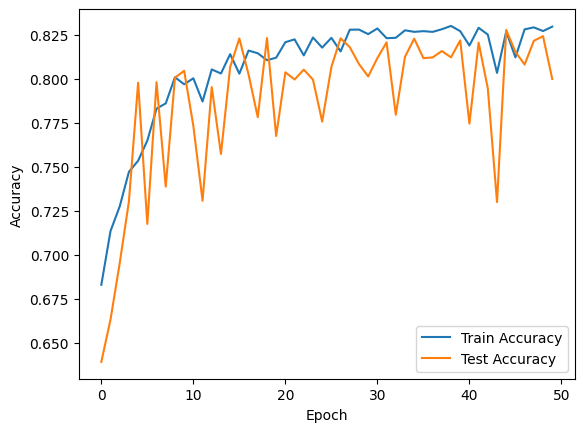

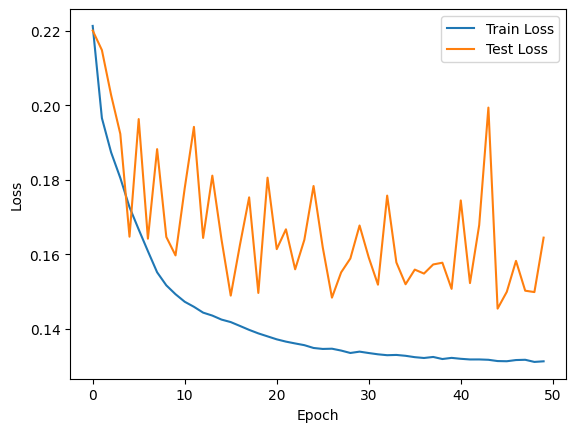

In [97]:
train_model(model2,optimizer2,criterion,X_train_tensor,y_train_tensor,X_test_tensor,y_test_tensor,num_epochs,batch_size)  # training the model

In [98]:
preds_model2 = get_predictions(model2, X_test_tensor) # getting the predictions for the model
print("Model 2 Test Predictions (first 10):", preds_model2[:10])

Model 2 Test Predictions (first 10): [[0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]]


In [99]:
torch.save(model2.state_dict(), "model2_final.pth") #saving the model for future use

## Multi Layer Multi Perceptron

In [114]:
# Creating class for the model
class MultilayerMultiPerceptron(nn.Module):
  def __init__(self):
    super(MultilayerMultiPerceptron,self).__init__()
    self.fc1= nn.Linear(25,64)
    self.relu1= nn.ReLU()
    self.fc2= nn.Linear(64,32)
    self.relu2= nn.ReLU()
    self.fc3= nn.Linear(32,1)
    self.sigmoid= nn.Sigmoid()



  def forward(self,x):
    out= self.fc1(x)
    out= self.relu1(out)
    out= self.fc2(out)
    out= self.relu2(out)
    out= self.fc3(out)
    out= self.sigmoid(out)
    return out

In [115]:
# creating object for the model3
model3= MultilayerMultiPerceptron()

In [116]:
criterion= nn.MSELoss()  # defining the loss function
optimizer3= optim.Adam(model3.parameters(),lr=0.001)  # defining the optimizer

num_epochs= 25 # number of epochs
batch_size= 50 # batch size

Epoch [1/25], Batch Train Loss: 0.2210, Train Loss: 0.2075, Train Accuracy: 0.6746, Train Precision: 0.7044, Train Recall: 0.6247, Train F1: 0.6622, Test Loss: 0.2115, Test Accuracy: 0.6765, Test Precision: 0.3619, Test Recall: 0.5115, Test F1: 0.4239, Test ROC-AUC: 0.6190
Epoch [2/25], Batch Train Loss: 0.1964, Train Loss: 0.1845, Train Accuracy: 0.7269, Train Precision: 0.7606, Train Recall: 0.6786, Train F1: 0.7173, Test Loss: 0.1968, Test Accuracy: 0.7185, Test Precision: 0.4171, Test Recall: 0.5271, Test F1: 0.4657, Test ROC-AUC: 0.6518
Epoch [3/25], Batch Train Loss: 0.1803, Train Loss: 0.1818, Train Accuracy: 0.7209, Train Precision: 0.7207, Train Recall: 0.7401, Train F1: 0.7303, Test Loss: 0.2140, Test Accuracy: 0.6787, Test Precision: 0.3787, Test Recall: 0.5944, Test F1: 0.4627, Test ROC-AUC: 0.6493
Epoch [4/25], Batch Train Loss: 0.1734, Train Loss: 0.1682, Train Accuracy: 0.7562, Train Precision: 0.7968, Train Recall: 0.7013, Train F1: 0.7460, Test Loss: 0.1856, Test Accur

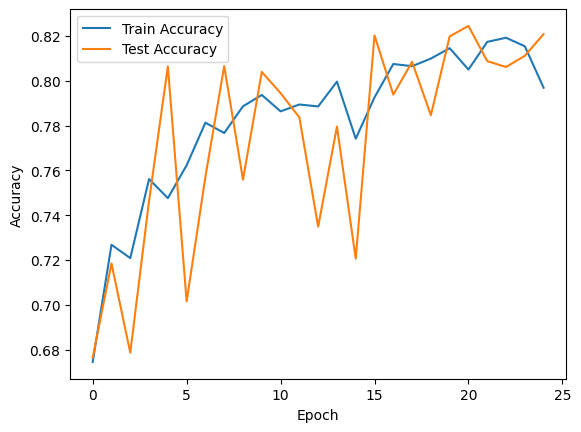

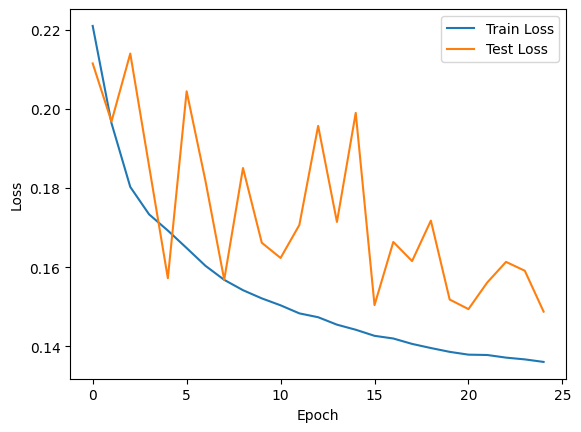

In [117]:
train_model(model3,optimizer3,criterion,X_train_tensor,y_train_tensor,X_test_tensor,y_test_tensor,num_epochs,batch_size)

In [118]:
preds_model3 = get_predictions(model3, X_test_tensor)
print("Model 3 Test Predictions (first 10):", preds_model3[:10])

Model 3 Test Predictions (first 10): [[0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]]


In [119]:
torch.save(model3.state_dict(), "model3_final.pth") #saving the model for further use